In [1]:
## Data set Imported https://www.kaggle.com/datasets/alexteboul/heart-disease-health-indicators-dataset
## https://www.kaggle.com/code/sachinsharma1123/disease-prediction-for-freshers
import numpy 
import time
from matplotlib.pyplot import figure


import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, recall_score, accuracy_score
from sklearn.model_selection import cross_val_predict, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, StratifiedKFold, RandomizedSearchCV, train_test_split
from sklearn.inspection import permutation_importance

import category_encoders as ce
np.random.seed(0)


## Download a dataset for any public repository
## Understand the dimensions of your data

In [3]:
hearth_data = pd.read_csv("heart_disease_health.csv",low_memory=False)
hearth_data


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,0.0,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,0.0,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,0.0,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [4]:
hearth_data.HeartDiseaseorAttack.value_counts()

0.0    229787
1.0     23893
Name: HeartDiseaseorAttack, dtype: int64

In [5]:
hearth_data.isnull().sum()

HeartDiseaseorAttack    0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
Diabetes                0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [6]:
hearth_data.isna().sum().sort_values()


HeartDiseaseorAttack    0
Age                     0
Sex                     0
DiffWalk                0
PhysHlth                0
MentHlth                0
GenHlth                 0
NoDocbcCost             0
AnyHealthcare           0
HvyAlcoholConsump       0
Veggies                 0
Fruits                  0
PhysActivity            0
Diabetes                0
Stroke                  0
Smoker                  0
BMI                     0
CholCheck               0
HighChol                0
HighBP                  0
Education               0
Income                  0
dtype: int64

## Identify the data types available in the dataset


In [7]:
hearth_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

In [8]:
hearth_data.shape

(253680, 22)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level

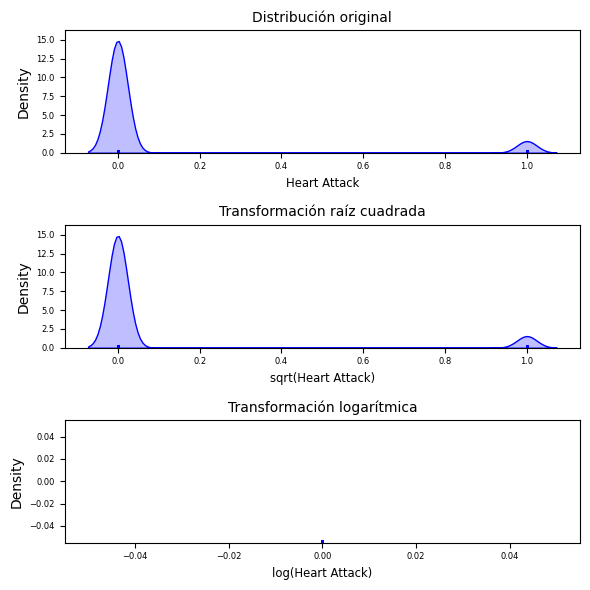

In [9]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    hearth_data.HeartDiseaseorAttack,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Heart Attack', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(hearth_data.HeartDiseaseorAttack),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(Heart Attack)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(hearth_data.HeartDiseaseorAttack),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(Heart Attack)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [10]:
hearth_data.select_dtypes(include=['float64', 'int']).describe()


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


IndexError: list index out of range

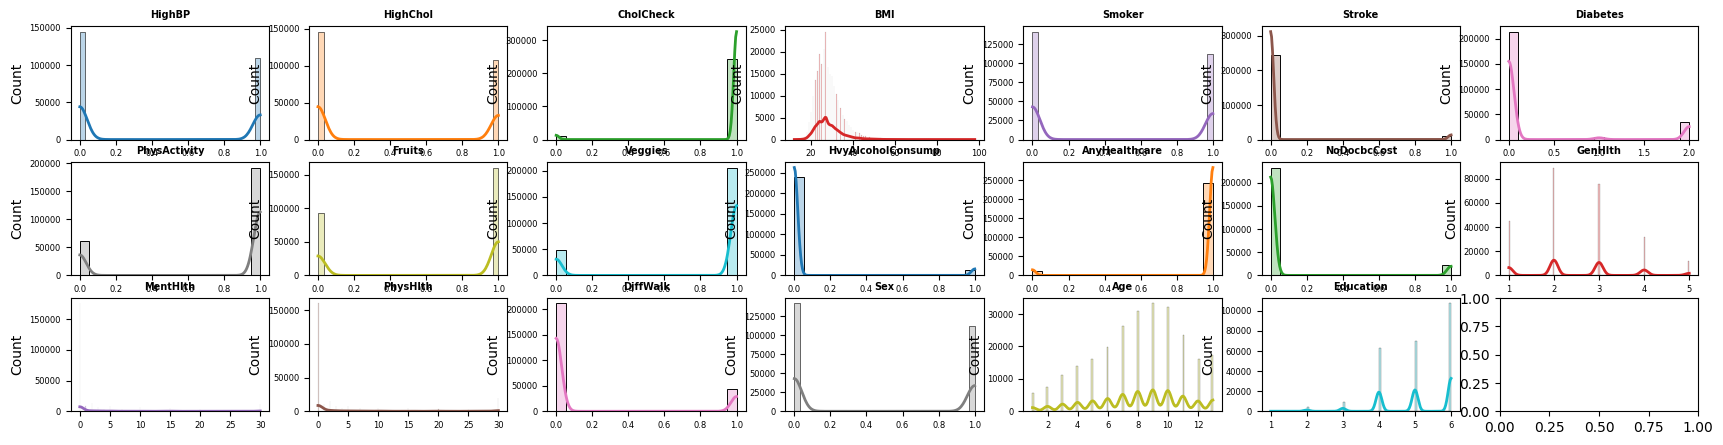

In [11]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(21, 5))
axes = axes.flat
columnas_numeric = hearth_data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('HeartDiseaseorAttack')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = hearth_data,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");

In [ ]:
# Valores observados de BMI
# ==============================================================================
hearth_data.BMI.value_counts()


27.0    24606
26.0    20562
24.0    19550
25.0    17146
28.0    16545
        ...  
85.0        1
91.0        1
86.0        1
90.0        1
78.0        1
Name: BMI, Length: 84, dtype: int64

KeyboardInterrupt: 

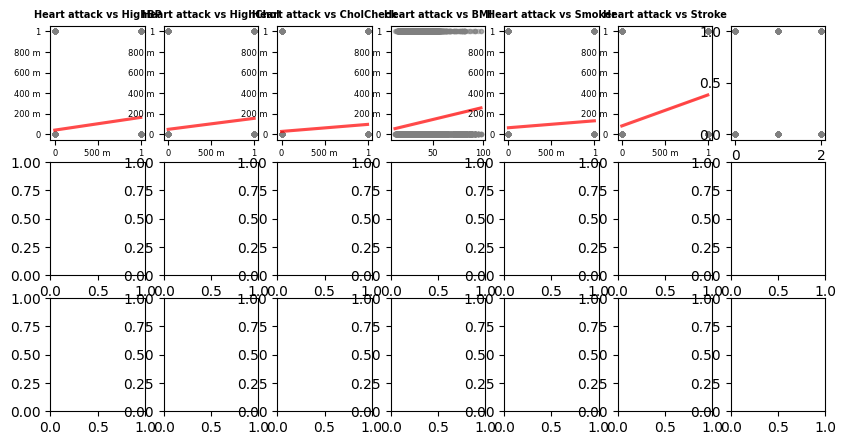

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=7, figsize=(10, 5))
axes = axes.flat
columnas_numeric = hearth_data.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('HeartDiseaseorAttack')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = hearth_data[colum],
        y           = hearth_data['HeartDiseaseorAttack'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"Heart attack vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
for i in [8]:
    fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Heart attacks correlation', fontsize = 10, fontweight = "bold")

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

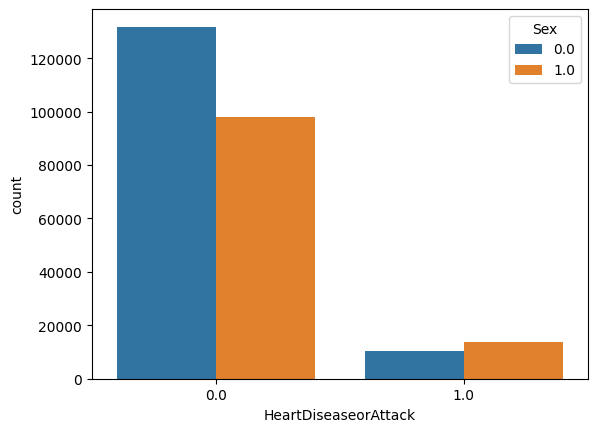

In [12]:

sns.countplot(x=hearth_data['HeartDiseaseorAttack'],hue='Sex', data=hearth_data,)

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

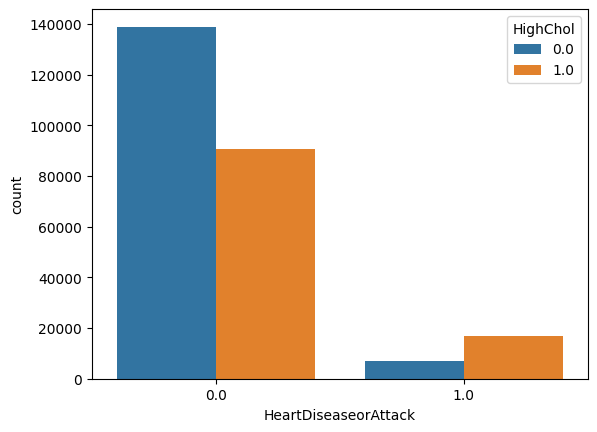

In [13]:
sns.countplot(x=hearth_data['HeartDiseaseorAttack'],hue='HighChol', data=hearth_data,)

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

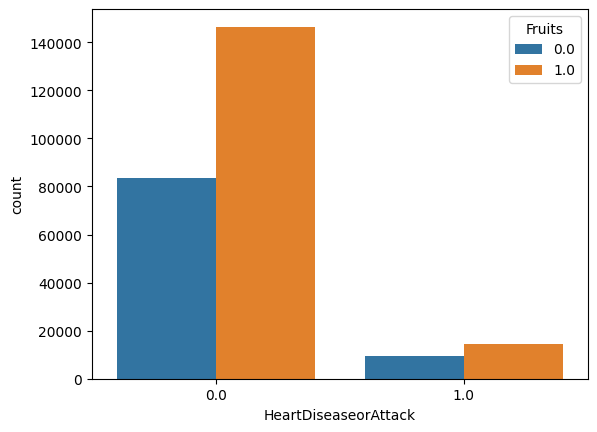

In [ ]:
sns.countplot(x=hearth_data['HeartDiseaseorAttack'],hue='Fruits', data=hearth_data,)

<AxesSubplot:xlabel='HeartDiseaseorAttack', ylabel='count'>

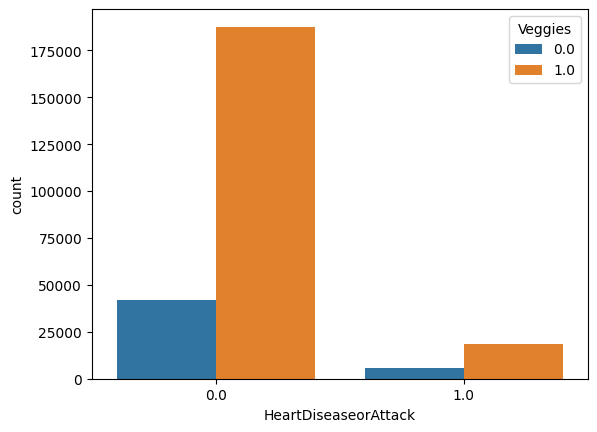

In [ ]:
sns.countplot(x=hearth_data['HeartDiseaseorAttack'],hue='Veggies', data=hearth_data,)

In [14]:
corr = hearth_data.corr()
display(corr)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
HeartDiseaseorAttack,1.000000,0.209361,0.180765,0.044206,0.052904,0.114441,0.203002,0.180272,-0.087299,-0.019790,...,0.018734,0.031000,0.258383,0.064621,0.181698,0.212709,0.086096,0.221618,-0.099600,-0.141011
HighBP,0.209361,1.000000,0.298199,0.098508,0.213748,0.096991,0.129575,0.271596,-0.125267,-0.040555,...,0.038425,0.017358,0.300530,0.056456,0.161212,0.223618,0.052207,0.344452,-0.141358,-0.171235
HighChol,0.180765,0.298199,1.000000,0.085642,0.106722,0.091299,0.092620,0.209085,-0.078046,-0.040859,...,0.042230,0.013310,0.208426,0.062069,0.121751,0.144672,0.031205,0.272318,-0.070802,-0.085459
CholCheck,0.044206,0.098508,0.085642,1.000000,0.034495,-0.009929,0.024158,0.067546,0.004190,0.023849,...,0.117626,-0.058255,0.046589,-0.008366,0.031775,0.040585,-0.022115,0.090321,0.001510,0.014259
BMI,0.052904,0.213748,0.106722,0.034495,1.000000,0.013804,0.020153,0.224379,-0.147294,-0.087518,...,-0.018471,0.058206,0.239185,0.085310,0.121141,0.197078,0.042950,-0.036618,-0.103932,-0.100069
Smoker,0.114441,0.096991,0.091299,-0.009929,0.013804,1.000000,0.061173,0.062914,-0.087401,-0.077666,...,-0.023251,0.048946,0.163143,0.092196,0.116460,0.122463,0.093662,0.120641,-0.161955,-0.123937
Stroke,0.203002,0.129575,0.092620,0.024158,0.020153,0.061173,1.000000,0.107179,-0.069151,-0.013389,...,0.008776,0.034804,0.177942,0.070172,0.148944,0.176567,0.002978,0.126974,-0.076009,-0.128599
Diabetes,0.180272,0.271596,0.209085,0.067546,0.224379,0.062914,0.107179,1.000000,-0.121947,-0.042192,...,0.015410,0.035436,0.302587,0.073507,0.176287,0.224239,0.031040,0.185026,-0.130517,-0.171483
PhysActivity,-0.087299,-0.125267,-0.078046,0.004190,-0.147294,-0.087401,-0.069151,-0.121947,1.000000,0.142756,...,0.035505,-0.061638,-0.266186,-0.125587,-0.219230,-0.253174,0.032482,-0.092511,0.199658,0.198539
Fruits,-0.019790,-0.040555,-0.040859,0.023849,-0.087518,-0.077666,-0.013389,-0.042192,0.142756,1.000000,...,0.031544,-0.044243,-0.103854,-0.068217,-0.044633,-0.048352,-0.091175,0.064547,0.110187,0.079929


In [ ]:


# for  i ,column in enumerate(hearth_data['Sex']):
#     if column == "F":
#         hearth_data.loc[i, 'Sex'] =  0.0
#     elif column == "M" :
#         hearth_data.loc[i, 'Sex'] = 1.0
        
    
# hearth_data.to_csv("heart_disease_health.csv", index=False)


    
 


<AxesSubplot:>

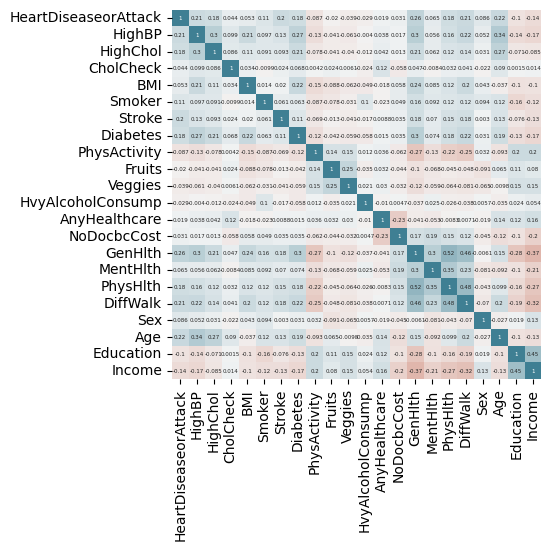

In [15]:
sns.heatmap(
    corr,
    cbar      = False,
    annot_kws = {"size": 4},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    annot=True,
)

In [16]:
hearth_data.select_dtypes(include=['object']).describe()


ValueError: Cannot describe a DataFrame without columns

In [17]:
train_data = pd.read_csv("heart_disease_health.csv")
test_data = pd.read_csv("test-data.csv") 


In [18]:
test_data.head()
train_data.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [19]:
def encode(X, y):
    categorical_variables = list(X.select_dtypes(['object']).columns)
    woe = ce.WOEEncoder().fit(X, y)
    return (woe, woe.transform(X))

def prepare_data(data, woe_encoder=None):
    X = data.copy()
    y = X.pop('HeartDiseaseorAttack')
    if woe_encoder is None:
        woe_encoder, encoded_X = encode(X, y)
    else:
        encoded_X = woe_encoder.transform(X)    
    
    for col in encoded_X.select_dtypes(['object']).columns:
        encoded_X[col] = encoded_X[col].astype(int)
    return (woe_encoder, encoded_X, y)

In [22]:
def eval_model(model, x, y):
    y_pred = model.predict(x)
    print(f'Confusion matrix:\n{confusion_matrix(y, y_pred)}\n')
    print(f'Accuracy of the model: {accuracy_score(y, y_pred)}')
    print(f'Recall of the model: {recall_score(y, y_pred)}\n')
    
def cv_eval_model(model, X, y):
    kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    y_pred = cross_val_predict(model, X, y, cv=kf, n_jobs=-1)
    print(f'CV Confusion matrix:\n{confusion_matrix(y, y_pred)}\n')
    print(f'CV Accuracy of the model: {accuracy_score(y, y_pred)}')
    print(f'CV Recall of the model: {recall_score(y, y_pred)}\n')
    return y_pred

In [23]:
woe_encoder, X_train, y_train = prepare_data(train_data)
X_train.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [24]:
woe_encoder, X_test, y_test = prepare_data(test_data, woe_encoder)
X_test.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [25]:
categorical_variables = list(train_data.select_dtypes(['float64']).columns)
X_train
# sns.pairplot(data=X_train[categorical_variables].join(y_train).head(10000),
#              hue='HeartDiseaseorAttack', plot_kws={'alpha': 0.2})

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253675,1.0,1.0,1.0,45.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,5.0,0.0,1.0,5.0,6.0,7.0
253676,1.0,1.0,1.0,18.0,0.0,0.0,2.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0
253677,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0
253678,1.0,0.0,1.0,23.0,0.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,7.0,5.0,1.0


In [26]:
def eval_model(model, x, y):
    y_pred = model.predict(x)
    print(f'Confusion matrix:\n{confusion_matrix(y, y_pred)}\n')
    print(f'Accuracy of the model: {accuracy_score(y, y_pred)}')
    print(f'Recall of the model: {recall_score(y, y_pred)}\n')
    
def cv_eval_model(model, X, y):
    kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
    y_pred = cross_val_predict(model, X, y, cv=kf, n_jobs=-1)
    print(f'CV Confusion matrix:\n{confusion_matrix(y, y_pred)}\n')
    print(f'CV Accuracy of the model: {accuracy_score(y, y_pred)}')
    print(f'CV Recall of the model: {recall_score(y, y_pred)}\n')
    return y_pred

In [27]:
%%time
base_model = RandomForestClassifier(random_state=1, n_jobs=-1).fit(X_train, y_train)
eval_model(base_model, X_train, y_train)

Confusion matrix:
[[229648    139]
 [  1017  22876]]

Accuracy of the model: 0.995443077893409
Recall of the model: 0.9574352320763404

CPU times: user 1min 18s, sys: 2.72 s, total: 1min 21s
Wall time: 10.1 s


In [28]:
%%time
y_pred = cv_eval_model(base_model, X_train, y_train)

CV Confusion matrix:
[[226350   3437]
 [ 21250   2643]]

CV Accuracy of the model: 0.9026844843897824
CV Recall of the model: 0.11061817268656092

CPU times: user 451 ms, sys: 220 ms, total: 671 ms
Wall time: 35.4 s


In [30]:
eval_model(base_model, X_test, y_test)

Confusion matrix:
[[2487    0]
 [   7  327]]

Accuracy of the model: 0.9975186104218362
Recall of the model: 0.9790419161676647



### Feature Importance

This refers to the different ways to assess the relevance of the feeatures used in the data used to train a specific model.

Not all the data used for training a model has the same impact on it, and not all the data has a positive impact in a model, i.e. some data can add noise and confuse the model.

It also contributes to a better understanding of the data in a specific problem, to improve a model and helps to explain the decisions being taken by the model.

In [31]:
def score_features(model, X, y):
    mod = pd.Series(model.feature_importances_, index=X.columns)
    start = time.time()
    r = permutation_importance(model, X, y, n_repeats=10, random_state=1, n_jobs=-1)
    perm = pd.Series(r.importances_mean, index=X.columns)
    perm_std = pd.Series(r.importances_std, index=X.columns)
    print(f'Total time for permutation feature selection: {time.time() - start:.2f} secs.\n')
    return pd.DataFrame({'model': mod, 'permutation': perm, 'permutation_std': perm_std})

def plot_feature_scores(scores):
    figure(figsize=(12, 8), dpi=80)
    scores = scores.sort_values(by='permutation', ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores['permutation'], xerr=scores['permutation_std'])
    plt.yticks(width, ticks)
    plt.title('permutation')

In [32]:
X_train_95, X_train_05, y_train_95, y_train_05 = train_test_split(
    X_train, y_train, test_size = 0.05, random_state=1, shuffle=True, stratify=y_train
)
X_train_90, X_train_10, y_train_90, y_train_10 = train_test_split(
    X_train, y_train, test_size = 0.10, random_state=1, shuffle=True, stratify=y_train
)
X_train_80, X_train_20, y_train_80, y_train_20 = train_test_split(
    X_train, y_train, test_size = 0.20, random_state=1, shuffle=True, stratify=y_train
)

In [33]:
sum(y_train) / len(y_train)

0.09418558814254178

In [34]:
sum(y_train_05) / len(y_train_05)

0.09421318196152634

Total time for permutation feature selection: 76.09 secs.

CPU times: user 5.59 s, sys: 5.9 s, total: 11.5 s
Wall time: 1min 16s


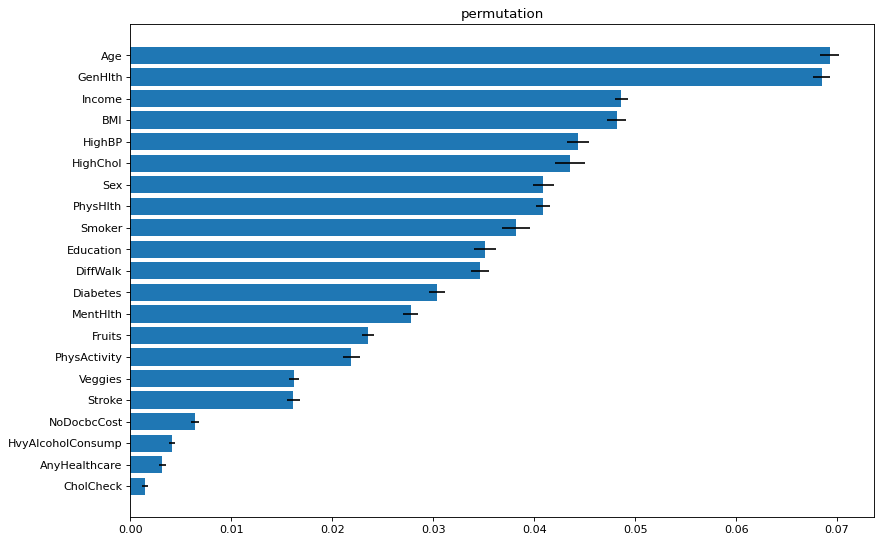

In [35]:
%%time
sf_base_model = score_features(base_model, X_train_05, y_train_05)
plot_feature_scores(sf_base_model)

### Hyper-parameters optimization

These are parameters passed as arguments when creating a model and tell the model how to behave during the learning process, thus these are not learned by the model.

Finding optimal parameters for the model (given a data set) can lead to better results of the model.

There are many approaches to the problem of optimizing hyper-parameters, including:

* Random Search
* Grid Search
 * Randomized Grid Search
* Evolutionary optimization
* Bayesian optimization

In [36]:
def train_model(params, x_train, y_train):
    
    if 'class_weight' in params:
        class_weight = params.pop('class_weight')
    else:
        class_weight = None
    
    start = time.time()
    grid_search = RandomizedSearchCV(
        n_jobs=-1,
        estimator=RandomForestClassifier(class_weight=class_weight, random_state=1, n_jobs=-1),
        param_distributions=params, n_iter=5, cv=5
    ).fit(x_train, y_train)
    
    print(f'Total time for random grid search: {time.time() - start:.2f} secs.\n')
    
    model = grid_search.best_estimator_
    print(f'Best model parameters:\n{model.get_params()}\n')
    eval_model(model, x_train, y_train)
    
    return model

In [37]:
%%time
params = {'n_estimators': [100, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [6, 8],
          'min_samples_split': [2, 4, 6],
          'class_weight': {0: 1, 1: 100}}

model = train_model(params, X_train, y_train)

Total time for random grid search: 114.45 secs.

Best model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 100}, 'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}

Confusion matrix:
[[ 52102 177685]
 [   135  23758]]

Accuracy of the model: 0.2990381583096815
Recall of the model: 0.9943498095676558

CPU times: user 1min 34s, sys: 2.34 s, total: 1min 36s
Wall time: 1min 55s


In [38]:
eval_model(model, X_test, y_test)

Confusion matrix:
[[ 379 2108]
 [   2  332]]

Accuracy of the model: 0.25203828429634884
Recall of the model: 0.9940119760479041



Total time for permutation feature selection: 13.64 secs.

CPU times: user 1.9 s, sys: 260 ms, total: 2.16 s
Wall time: 13.7 s


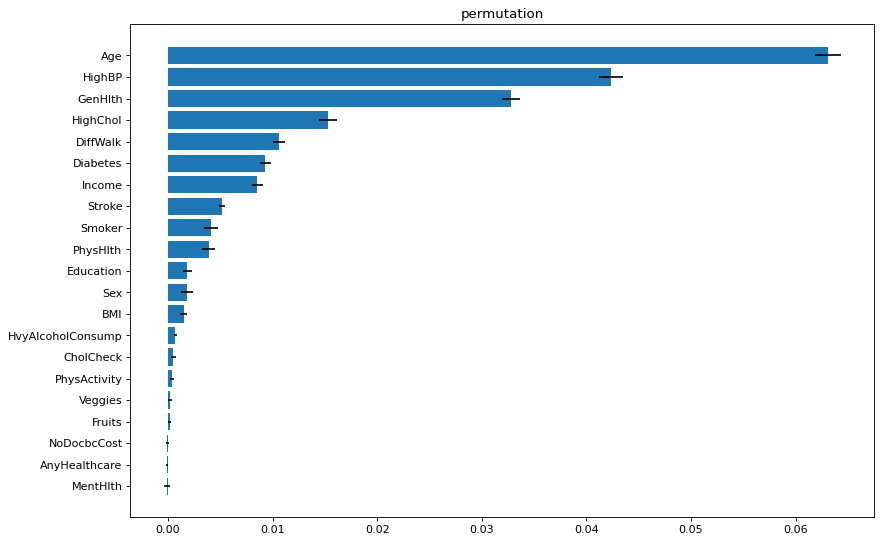

In [39]:
%%time
sf_model = score_features(model, X_train_10, y_train_10)
plot_feature_scores(sf_model)

In [40]:
%%time
params = {'n_estimators': [100, 200],
          'criterion': ['gini', 'entropy'],
          'max_depth': [6, 8],
          'min_samples_split': [2, 4, 6],
          'class_weight': {0: 1, 1: 100}}

n = 5
top_n_feats = sf_model.sort_values(by='permutation', ascending=False).index[:n]
model2 = train_model(params, X_train[top_n_feats], y_train)

Total time for random grid search: 94.25 secs.

Best model parameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': {0: 1, 1: 100}, 'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 6, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 200, 'n_jobs': -1, 'oob_score': False, 'random_state': 1, 'verbose': 0, 'warm_start': False}

Confusion matrix:
[[ 63416 166371]
 [   319  23574]]

Accuracy of the model: 0.34291233049511194
Recall of the model: 0.986648809274683

CPU times: user 58.5 s, sys: 1.73 s, total: 1min
Wall time: 1min 35s


In [41]:
eval_model(model2, X_test[top_n_feats], y_test)

Confusion matrix:
[[ 476 2011]
 [   3  331]]

Accuracy of the model: 0.2860687699397377
Recall of the model: 0.9910179640718563



In [42]:
%%time
m3 = RandomForestClassifier(**model2.get_params()).fit(X_train_20[top_n_feats], y_train_20)
eval_model(m3, X_train_20[top_n_feats], y_train_20)

Confusion matrix:
[[13376 32581]
 [   61  4718]]

Accuracy of the model: 0.3566304005045727
Recall of the model: 0.9872358233940155

CPU times: user 4.78 s, sys: 401 ms, total: 5.18 s
Wall time: 940 ms


In [43]:
eval_model(m3, X_train_80[top_n_feats], y_train_80)

Confusion matrix:
[[ 52781 131049]
 [   410  18704]]

Accuracy of the model: 0.35224002680542416
Recall of the model: 0.9785497541069373



In [44]:
eval_model(m3, X_train[top_n_feats], y_train)

Confusion matrix:
[[ 66157 163630]
 [   471  23422]]

Accuracy of the model: 0.35311810154525386
Recall of the model: 0.980287113380488



In [45]:
eval_model(m3, X_test[top_n_feats], y_test)

Confusion matrix:
[[ 506 1981]
 [   5  329]]

Accuracy of the model: 0.29599432825239275
Recall of the model: 0.9850299401197605



### Logistic Regression

In [2]:
dataframe = pd.read_csv(r"heart_disease_health.csv")
dataframe.head()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


In [3]:
dataframe.describe()

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,...,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000,253680.000000
mean,0.094186,0.429001,0.424121,0.962670,28.382364,0.443169,0.040571,0.296921,0.756544,0.634256,...,0.951053,0.084177,2.511392,3.184772,4.242081,0.168224,0.440342,8.032119,5.050434,6.053875
std,0.292087,0.494934,0.494210,0.189571,6.608694,0.496761,0.197294,0.698160,0.429169,0.481639,...,0.215759,0.277654,1.068477,7.412847,8.717951,0.374066,0.496429,3.054220,0.985774,2.071148
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000
50%,0.000000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000
75%,0.000000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,2.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [4]:
print(dataframe.groupby('HeartDiseaseorAttack').size())

HeartDiseaseorAttack
0.0    229787
1.0     23893
dtype: int64


In [5]:
X = np.array(dataframe.drop(['HeartDiseaseorAttack'],1))
y = np.array(dataframe['HeartDiseaseorAttack'])
X.shape

/var/folders/yl/shyf6xvn3kd_34hlchpy_xlc0000gn/T/ipykernel_96839/2652855125.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(dataframe.drop(['HeartDiseaseorAttack'],1))


(253680, 21)

In [47]:
model = linear_model.LogisticRegression(max_iter=500)
model.fit(X,y)

LogisticRegression(max_iter=500)

In [75]:
predictions = model.predict(X)
ones = 0
zeros = 0
for i in range(len(predictions)) :

    if predictions[i] == 1:
        ones += 1
    else:
        zeros += 1
print(ones)
print(zeros)        

5620
248060


In [49]:
model.score(X,y)

0.9076986754966887

In [50]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [54]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10) 
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
print(msg)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression: 0.907940 (0.001573)


In [55]:
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))

0.9065949227373068


In [60]:
print(confusion_matrix(Y_validation, predictions))

[[45369   553]
 [ 4186   628]]


In [62]:
print(classification_report(Y_validation, predictions))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95     45922
         1.0       0.53      0.13      0.21      4814

    accuracy                           0.91     50736
   macro avg       0.72      0.56      0.58     50736
weighted avg       0.88      0.91      0.88     50736

